In [1]:
import os

import string
import sys
import seaborn as sn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
%matplotlib inline
import string
import sys
from collections import deque

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import statistics

sys.path.append("code/.")
from sklearn import datasets
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import average_precision_score
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import StackingClassifier
import eli5

In [2]:
data = pd.read_csv("data/all_stats.csv", index_col = 0)
data.head(10)
data.shape

(2347, 304)

In [3]:
## Drop all NA columns
data_na = data.dropna(axis = 1, how = 'all')
data_na.shape

(2347, 299)

Text(0.5, 1.0, 'Distribution of Strikeouts Per Game')

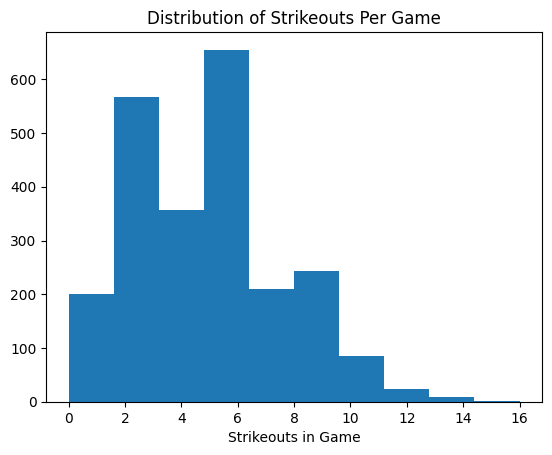

In [4]:
plt.hist(data_na['K'])
plt.xlabel("Strikeouts in Game")
plt.title("Distribution of Strikeouts Per Game")

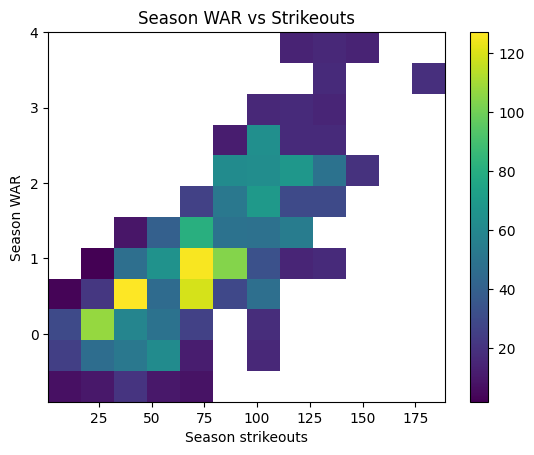

In [5]:
plt.hist2d(data['SO_x'], data['WAR_x'], bins = 12, cmin = 2)
plt.xlabel("Season strikeouts")
plt.ylabel("Season WAR")
plt.title("Season WAR vs Strikeouts")
plt.colorbar()

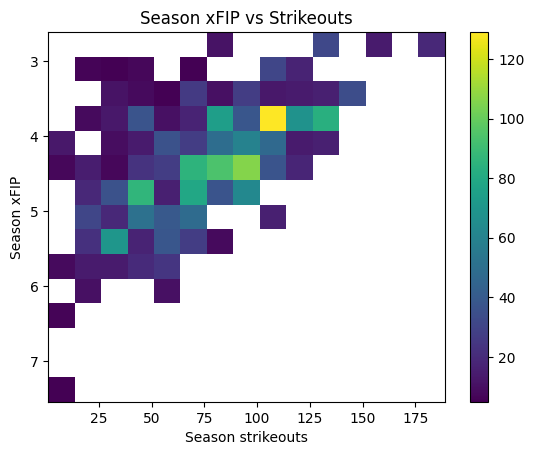

In [6]:
plt.hist2d(data['SO_x'], data['xFIP'], bins = 15, cmin = 5)
plt.xlabel("Season strikeouts")
plt.ylabel("Season xFIP")
plt.gca().invert_yaxis()
plt.title("Season xFIP vs Strikeouts")
plt.colorbar()

/var/folders/h6/_rz_hgwd06q2j4rsml2mr9yr0000gn/T/ipykernel_1695/2641184353.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  team_means = data_na.groupby("Opp").mean()


Text(0.5, 1.0, 'Strikeouts by Opposing Team against Starting Pitcher')

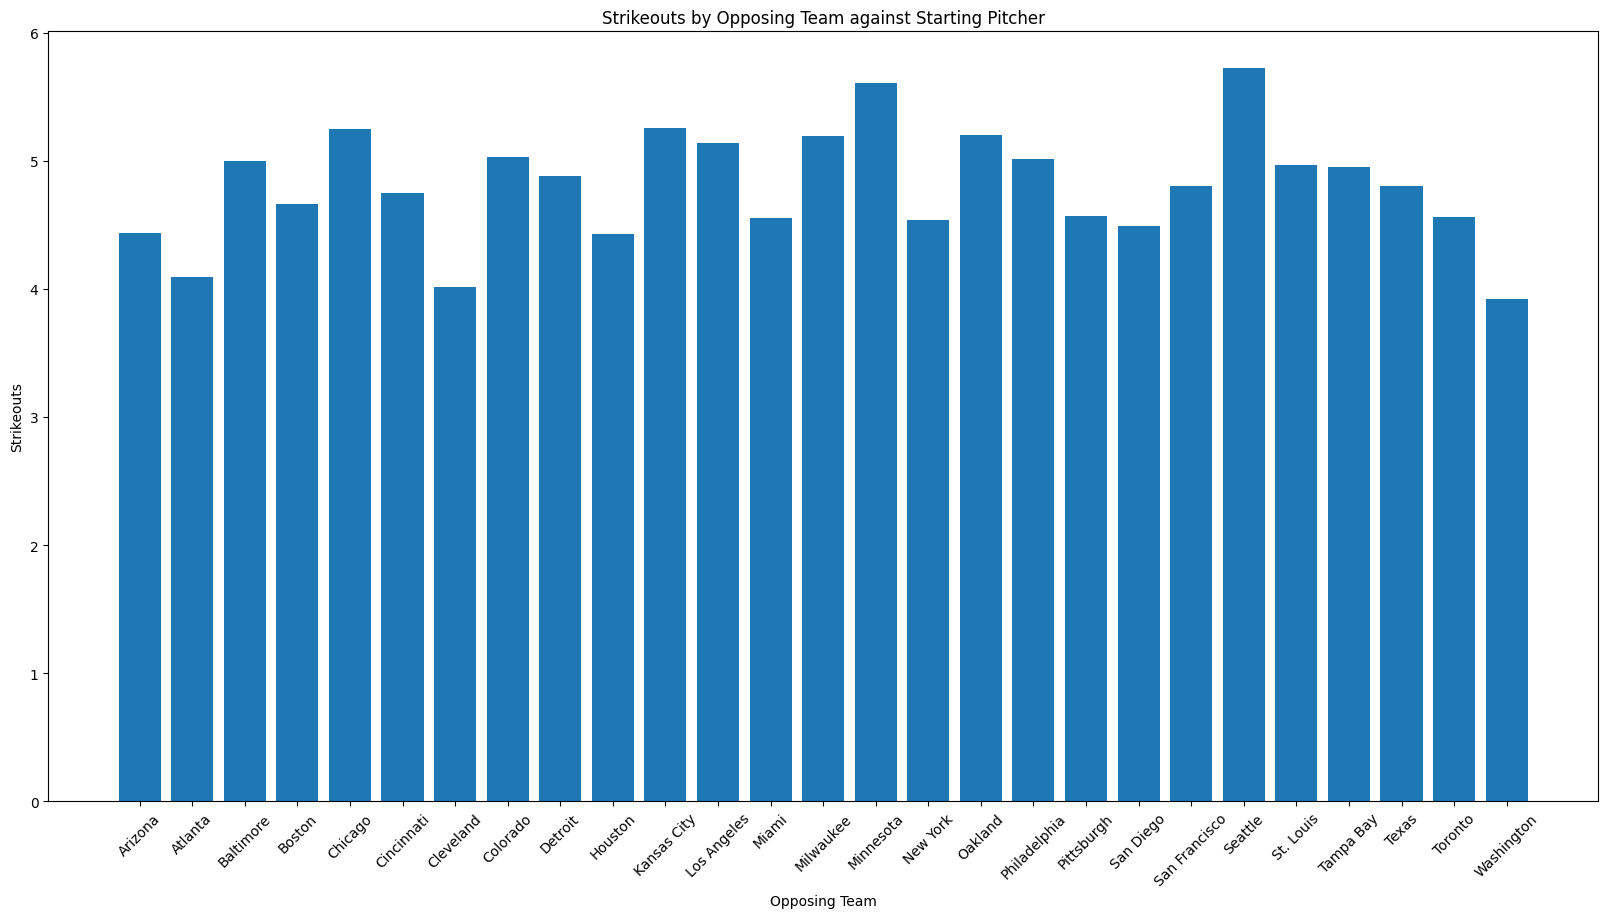

In [7]:
team_means = data_na.groupby("Opp").mean()
team_means
fig = plt.figure(figsize = (20,10))
plt.bar(team_means.index, team_means['K'])
plt.xlabel("Opposing Team")
plt.ylabel("Strikeouts")
plt.xticks(fontsize = 10, rotation = 45)
plt.title("Strikeouts by Opposing Team against Starting Pitcher")

In [8]:
data.to_csv("data/data_preds.csv")